# Explore basins and states: all-to-all

In [31]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from tqdm import tqdm

sys.path.append("../code/")

import xgi
from kuramoto_hoi import *

sb.set_theme(style="ticks", context="notebook")

results_dir = "results/"
data_dir = "data/"

Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

## Generate structure

In [2]:
N = 30

H = xgi.complete_hypergraph(N, max_order=2)

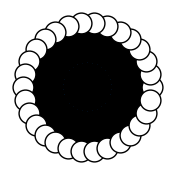

In [3]:
fig, ax = plt.subplots(figsize=(2, 2))
pos = xgi.circular_layout(H)

xgi.draw(H, pos=pos, ax=ax)

plt.show()

In [4]:
# may be used in the simulation function
links = H.edges.filterby("size", 2).members()
triangles = H.edges.filterby("size", 3).members()
adj1 = xgi.adjacency_matrix(H, order=1)
adj2 = xgi.adjacency_matrix(H, order=2)
k1_avg = H.nodes.degree(order=1).mean()
k2_avg = H.nodes.degree(order=2).mean()

## Dynamics

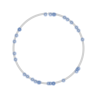

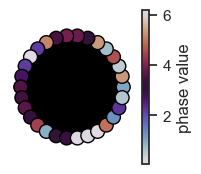

In [135]:
# Set parameters

# dynamical
k1 = 1 # pairwise coupling strength
k2 = 1 # triplet coupling strength
omega = 1 * np.ones(N)  # np.random.normal(size=N) #1 * np.ones(N)

ic = "random"  # initial condition type, see below
noise = 1e-1  # noise strength
p2 = None


psi_init = generate_state(N, kind=ic, q=2, noise=noise)

# integration
t_end = 200
dt = 0.01
times = np.arange(0, t_end + dt / 2, dt)

tag_params = f"k1_{k1}_k2_{k2}_ic_{ic}"

fig, ax = plt.subplots(figsize=(1,1))
plot_phases(psi_init, it=None, ax=ax)
plt.show()

# only to viz twisted states
fig, ax = plt.subplots(figsize=(2,2))
ax, im = xgi.draw(H, pos=pos, node_fc=psi_init % (2*np.pi), node_fc_cmap="twilight", node_size=1)
plt.colorbar(im, label="phase value")

In [129]:
def rhs_pairwise_triplet_all_sym(t, psi, omega, k1, k2):
    
    out = rhs_pairwise_all(t, psi, omega, k1, k2) + rhs_triplet_all_sym(t, psi, omega, k1, k2) - omega
    
    return out

def rhs_pairwise_triplet_all_asym(t, psi, omega, k1, k2):
    
    out = rhs_pairwise_all(t, psi, omega, k1, k2) + rhs_triplet_all_asym(t, psi, omega, k1, k2) - omega
    
    return out

In [130]:
n_reps = 100

# simulate
#kwargs = {
#    "links": links,
#    "triangles": triangles,
#    "k1_avg": k1_avg,
#    "k2_avg": k2_avg,
#}

thetas_arr = np.zeros((n_reps, N, len(times)))

for i in tqdm(range(n_reps)):
    
    psi_init = generate_state(N, kind="random", noise=noise)

    thetas, times = simulate_kuramoto(
        H,
        k1,
        k2,
        omega=omega,
        theta_0=psi_init,
        t_end=t_end,
        dt=dt,
        rhs=rhs_pairwise_triplet_all_sym,
        #**kwargs
    )
    
    thetas_arr[i] = thetas


100%|█████████████████████████████████████████| 100/100 [00:54<00:00,  1.82it/s]


Text(0.5, 0.98, 'k1_1_k2_1_ic_random')

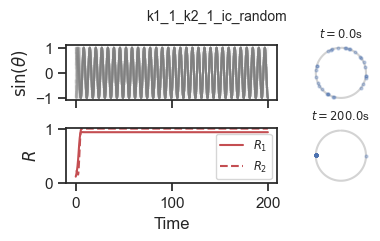

In [142]:
# plot the last repetition
i = 4
fig, axs = plot_sync(thetas_arr[i], times)

axs[0, 1].set_title(f"$t={times[0]}$s", fontsize="x-small")
axs[1, 1].set_title(f"$t={times[-1]}$s", fontsize="x-small")

axs[0, 0].set_xlabel("")
axs[1, 0].legend(loc="best", fontsize="x-small")

plt.subplots_adjust(hspace=0.5, top=0.8)

fig.suptitle(tag_params, fontsize="small")

In [141]:
states = [identify_state(thetas, atol=0.1) for thetas in thetas_arr]
set(states)

{'2-cluster', 'sync'}

In [133]:
np.unique(states, return_counts=True)

(array(['2-cluster', 'sync'], dtype='<U9'), array([79, 21]))

In [134]:
states

['sync',
 '2-cluster',
 'sync',
 'sync',
 'sync',
 '2-cluster',
 'sync',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 'sync',
 'sync',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 'sync',
 '2-cluster',
 'sync',
 '2-cluster',
 '2-cluster',
 'sync',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 'sync',
 '2-cluster',
 '2-cluster',
 'sync',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 'sync',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 'sync',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 'sync',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 '2-cluster',
 'sync',
 '

In [161]:
diff = np.diff(thetas_arr[4, :, -1])
diff

array([-3.14159265, -3.14159265,  6.28318531,  0.        , -6.28318531,
        6.28318531,  0.        ,  0.        ,  0.        , -6.28318531,
        0.        ,  0.        ,  0.        ,  6.28318531,  0.        ,
       -6.28318531,  6.28318531, -6.28318531,  6.28318531, -6.28318531,
        6.28318531, -6.28318531,  6.28318531, -6.28318531,  6.28318531,
        0.        , -6.28318531,  6.28318531, -6.28318531])

In [162]:
diff % (2*np.pi)

array([3.14159265e+00, 3.14159265e+00, 6.28318531e+00, 0.00000000e+00,
       1.63424829e-13, 6.28318531e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.63424829e-13, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.28318531e+00, 0.00000000e+00, 1.63424829e-13,
       6.28318531e+00, 1.63424829e-13, 6.28318531e+00, 1.63424829e-13,
       6.28318531e+00, 1.63424829e-13, 6.28318531e+00, 1.63424829e-13,
       6.28318531e+00, 0.00000000e+00, 1.63424829e-13, 6.28318531e+00,
       1.63424829e-13])

In [165]:
set(np.round(diff % (2*np.pi), 4)) 

{0.0, 3.1416, 6.2832}

In [160]:
n

6.283185307179586